In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('BTC-USD.csv')

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
X = data[['Open', 'High', 'Low', 'Volume']]  
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [5]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


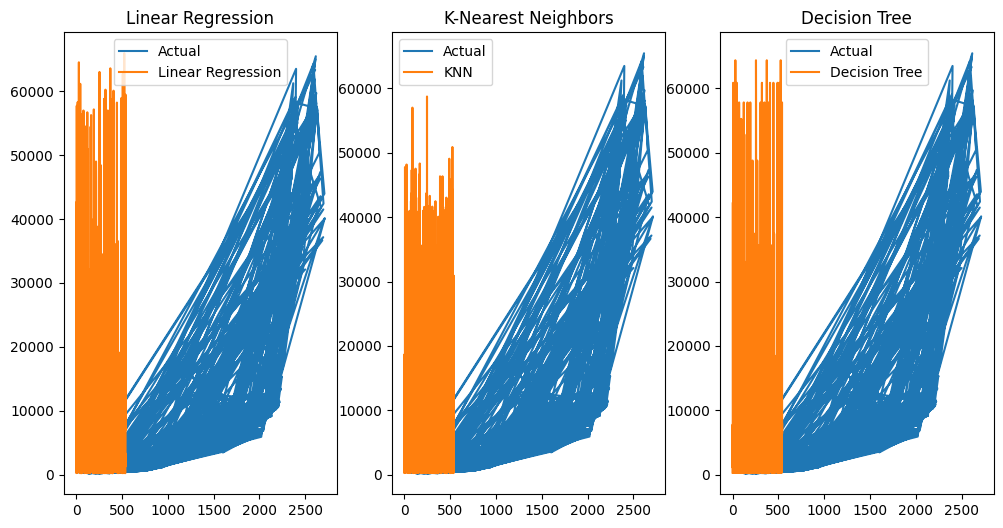

In [6]:
plt.figure(figsize=(12, 6))

# Line Plots for Predictions vs. Actual
plt.subplot(1, 3, 1)
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lr, label='Linear Regression')
plt.title('Linear Regression')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test, label='Actual')
plt.plot(y_pred_knn, label='KNN')
plt.title('K-Nearest Neighbors')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test, label='Actual')
plt.plot(y_pred_tree, label='Decision Tree')
plt.title('Decision Tree')
plt.legend()

plt.show()


In [9]:
def calculate_RSI(data, window=14):
    delta = data['Close'].diff()
    up_days = delta.copy()
    up_days[delta <= 0] = 0.0
    down_days = abs(delta.copy())
    down_days[delta > 0] = 0.0

    RS_up = up_days.ewm(com=window-1, min_periods=window).mean()
    RS_down = down_days.ewm(com=window-1, min_periods=window).mean()
    RSI = 100 - 100 / (1 + RS_up / RS_down)
    return RSI



In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  return mse, mae, r2

mse_lr, mae_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_knn, mae_knn, r2_knn = evaluate_model(y_test, y_pred_knn)
mse_tree, mae_tree, r2_tree = evaluate_model(y_test, y_pred_tree)

print('Linear Regression - MSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}'.format(mse_lr, mae_lr, r2_lr))
print('KNN - MSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}'.format(mse_knn, mae_knn, r2_knn))
print('Decision Tree - MSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}'.format(mse_tree, mae_tree, r2_tree))



Linear Regression - MSE: 107039.08, MAE: 141.31, R-squared: 1.00
KNN - MSE: 139671554.62, MAE: 6318.37, R-squared: 0.49
Decision Tree - MSE: 501127.37, MAE: 405.11, R-squared: 1.00
